# Project Summary

*   Model 1 - Deep Neural Network
    * Train Accuracy = 0.3566
    * Test Accuracy = 0.0395

*   Model 2 - LSTM
      * Train Accuracy = 0.587
      * Test Accuracy = 0.1019

*   Model 3 - GRU
      * Train Accuracy = 1
      * Test Accuracy = 0.3992
      
*   Model 4 - Stacked GRU
      * Train Accuracy = 1
      * Test Accuracy =

# Imports and Data Loading

## Import Lib

In [1]:
# Pandas and Numpy
import numpy as np
import pandas as pd

# Charting and plotting
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

# Ignore Warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Flatten, TimeDistributed, Dropout, GRU, BatchNormalization
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.preprocessing.text import Tokenizer

In [4]:
from keras import Input

In [5]:
from keras.optimizers import Adam

In [6]:
import datetime

In [7]:
import math

In [8]:
# Regular expression library
import re

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
from numpy import asarray

In [11]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [12]:
import seaborn as sns

In [13]:
import random

In [14]:
# import chain
from itertools import chain

In [15]:
from pickle import load, dump

## Loading Dataset

In [16]:
path = '/content/drive/MyDrive/Mtech_Project/Dataset_Pose/Complete_landmark.csv'
df_landmark =  pd.read_csv(path)

In [17]:
df_landmark

,Unnamed: 0,POSE,IMG,TS,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_THUMB_CMC_x,LEFT_THUMB_CMC_y,LEFT_THUMB_MCP_x,LEFT_THUMB_MCP_y,LEFT_THUMB_IP_x,LEFT_THUMB_IP_y,LEFT_THUMB_TIP_x,LEFT_THUMB_TIP_y,LEFT_INDEX_FINGER_MCP_x,LEFT_INDEX_FINGER_MCP_y,LEFT_INDEX_FINGER_PIP_x,LEFT_INDEX_FINGER_PIP_y,LEFT_INDEX_FINGER_DIP_x,LEFT_INDEX_FINGER_DIP_y,LEFT_INDEX_FINGER_TIP_x,LEFT_INDEX_FINGER_TIP_y,LEFT_MIDDLE_FINGER_MCP_x,LEFT_MIDDLE_FINGER_MCP_y,LEFT_MIDDLE_FINGER_PIP_x,LEFT_MIDDLE_FINGER_PIP_y,LEFT_MIDDLE_FINGER_DIP_x,LEFT_MIDDLE_FINGER_DIP_y,LEFT_MIDDLE_FINGER_TIP_x,LEFT_MIDDLE_FINGER_TIP_y,LEFT_RING_FINGER_MCP_x,LEFT_RING_FINGER_MCP_y,LEFT_RING_FINGER_PIP_x,LEFT_RING_FINGER_PIP_y,LEFT_RING_FINGER_DIP_x,LEFT_RING_FINGER_DIP_y,LEFT_RING_FINGER_TIP_x,LEFT_RING_FINGER_TIP_y,LEFT_PINKY_MCP_x,LEFT_PINKY_MCP_y,...,POSE_LEFT_EYE_OUTER_y,POSE_RIGHT_EYE_INNER_x,POSE_RIGHT_EYE_INNER_y,POSE_RIGHT_EYE_x,POSE_RIGHT_EYE_y,POSE_RIGHT_EYE_OUTER_x,POSE_RIGHT_EYE_OUTER_y,POSE_LEFT_EAR_x,POSE_LEFT_EAR_y,POSE_RIGHT_EAR_x,POSE_RIGHT_EAR_y,POSE_MOUTH_LEFT_x,POSE_MOUTH_LEFT_y,POSE_MOUTH_RIGHT_x,POSE_MOUTH_RIGHT_y,POSE_LEFT_SHOULDER_x,POSE_LEFT_SHOULDER_y,POSE_RIGHT_SHOULDER_x,POSE_RIGHT_SHOULDER_y,POSE_LEFT_ELBOW_x,POSE_LEFT_ELBOW_y,POSE_RIGHT_ELBOW_x,POSE_RIGHT_ELBOW_y,POSE_LEFT_WRIST_x,POSE_LEFT_WRIST_y,POSE_RIGHT_WRIST_x,POSE_RIGHT_WRIST_y,POSE_LEFT_PINKY_x,POSE_LEFT_PINKY_y,POSE_RIGHT_PINKY_x,POSE_RIGHT_PINKY_y,POSE_LEFT_INDEX_x,POSE_LEFT_INDEX_y,POSE_RIGHT_INDEX_x,POSE_RIGHT_INDEX_y,POSE_LEFT_THUMB_x,POSE_LEFT_THUMB_y,POSE_RIGHT_THUMB_x,POSE_RIGHT_THUMB_y,FRAME
0,0,Male,MVI_9764,0.0,0.554524,0.818952,0.541361,0.838500,0.535188,0.862879,0.534068,0.886003,0.531395,0.902247,0.545833,0.883770,0.541705,0.912174,0.536763,0.919220,0.532906,0.920950,0.554264,0.884307,0.549163,0.912758,0.543017,0.916445,0.538412,0.914603,0.560365,0.880998,0.556451,0.905657,0.550823,0.908146,0.546555,0.905282,0.564691,0.875349,...,0.217290,0.491026,0.216521,0.484589,0.217490,0.477956,0.218455,0.521970,0.232696,0.467279,0.232452,0.506679,0.267772,0.487353,0.267257,0.560054,0.390919,0.426649,0.386531,0.563580,0.612573,0.412600,0.613583,0.565623,0.809563,0.414633,0.824400,0.568252,0.870875,0.407392,0.884026,0.556969,0.869969,0.421249,0.883424,0.552976,0.852818,0.427020,0.864435,1.0
1,1,Male,MVI_9764,40.0,0.553981,0.821863,0.541467,0.837821,0.535376,0.861729,0.533795,0.885026,0.531535,0.902524,0.545177,0.882600,0.541889,0.911420,0.537220,0.919591,0.533385,0.922177,0.553403,0.882680,0.549235,0.911765,0.543526,0.916637,0.539294,0.915257,0.559676,0.878558,0.556748,0.904362,0.551241,0.909181,0.546877,0.908418,0.564308,0.872608,...,0.225920,0.482109,0.226093,0.476051,0.227236,0.470339,0.228469,0.516942,0.239489,0.460055,0.243314,0.500117,0.276928,0.479574,0.276316,0.555230,0.389533,0.419272,0.390409,0.555655,0.608884,0.407832,0.615306,0.558306,0.807233,0.407363,0.824495,0.561790,0.868508,0.403280,0.884834,0.551052,0.868154,0.413834,0.884933,0.546053,0.851548,0.417822,0.866165,2.0
2,2,Male,MVI_9764,80.0,0.554276,0.824348,0.541305,0.839069,0.534952,0.862659,0.533324,0.885795,0.531073,0.903048,0.544905,0.882755,0.541971,0.912174,0.537385,0.920150,0.533608,0.922010,0.553118,0.883502,0.548768,0.912096,0.543099,0.916280,0.539043,0.913893,0.559469,0.879800,0.556417,0.905380,0.550846,0.909376,0.546530,0.907491,0.564345,0.874298,...,0.230027,0.482060,0.229073,0.476246,0.229987,0.470627,0.230794,0.514376,0.241967,0.459963,0.245692,0.499147,0.281054,0.479037,0.280254,0.552659,0.389396,0.417065,0.390774,0.552933,0.606591,0.405044,0.615116,0.555332,0.805086,0.402685,0.818801,0.559675,0.866627,0.401733,0.881704,0.550092,0.867524,0.413142,0.882253,0.544312,0.850722,0.416393,0.863463,3.0
3,3,Male,MVI_9764,120.0,0.554318,0.824571,0.541338,0.838520,0.535285,0.861851,0.533740,0.885251,0.531309,0.902702,0.545673,0.883199,0.542433,0.911342,0.537766,0.919374,0.533909,0.922135,0.553881,0.883847,0.549043,0.911463,0.543141,0.916335,0.538922,0.915254,0.560072,0.879903,0.556657,0.904628,0.550998,0.908871,0.546688,0.907880,0.564

## Train Test Split

In [18]:
poses = list(set(df_landmark.POSE))
print(poses)

['Dream', 'Paint', 'Queen', 'Suit', 'Tomorrow', 'Bathroom', 'Truck', 'Deep', 'Skirt', 'Mouse', 'Pencil', 'Mother', 'Money', 'Narrow', 'Pocket', 'Dog', 'Screen', 'Morning', 'Shirt', 'Rich', 'Wife', 'Green', 'Brown', 'Letter', 'Clean', 'Today', 'King', 'Soldier', 'Box', 'Team', 'Husband', 'Paper', 'Female', 'Bill', 'Year', 'Colour', 'Boat', 'T_Shirt', 'Monday', 'Attack', 'Sunday', 'Deaf', 'Baby', 'Hat', 'Ball', 'Crowd', 'Long', 'Laptop', 'Adult', 'Shallow', 'Man', 'Animal', 'Table', 'Parent', 'Low', 'Fan', 'You', 'Tuesday', 'Good_morning', 'Book', 'Lawyer', 'Student', 'Dress', 'Hour', 'Evening', 'Bedroom', 'Ring', 'Phone', 'Curved', 'Yesterday', 'Boy', 'Afternoon', 'Police', 'Neighbour', 'Winter', 'Science', 'Energy', 'He', 'Exercise', 'Family', 'Small', 'Expensive', 'Monsoon', 'Soap', 'Camera', 'Good_afternoon', 'Loud', 'Secretary', 'President', 'It', 'Dead', 'Thin', 'Old', 'Computer', 'High', 'Gift', 'Horse', 'Bird', 'Male', 'Sick', 'Pen', 'Child', 'Clothing', 'Thank_you', 'Warm', 'Spr

In [19]:
train_imgs = list()
test_imgs = list()
for word in poses:
  imgs = list(set(df_landmark[df_landmark.POSE == word].IMG))
  random.shuffle(imgs)
  count = len(imgs)
  train_count = math.trunc(0.80*count)
  #print('Pose:',word,'|','Count:',count,'|','Train:',train_count)
  train_lst = imgs[:train_count]
  train_imgs.extend(train_lst)
  test_lst = imgs[train_count:count]
  test_imgs.extend(test_lst)
  print('Pose:',word,'|','Count:',count,'|','Train:',train_lst,'|','Test:',test_lst)

Pose: Dream | Count: 14 | Train: ['MVI_4357', 'MVI_8764', 'MVI_8765', 'MVI_4878', 'MVI_9011', 'MVI_9012', 'MVI_4359', 'MVI_4880', 'MVI_8762', 'MVI_4879', 'MVI_9010'] | Test: ['MVI_4361', 'MVI_4360', 'MVI_8763']
Pose: Paint | Count: 15 | Train: ['MVI_9053', 'MVI_9051', 'MVI_4415', 'MVI_8820', 'MVI_8819', 'MVI_4926', 'MVI_8817', 'MVI_8818', 'MVI_8821', 'MVI_4927', 'MVI_4414', 'MVI_4928'] | Test: ['MVI_4412', 'MVI_9052', 'MVI_4413']
Pose: Queen | Count: 20 | Train: ['MVI_3955', 'MVI_5271', 'MVI_3805', 'MVI_4973', 'MVI_3807', 'MVI_3954', 'MVI_4974', 'MVI_4101', 'MVI_5273', 'MVI_4239', 'MVI_3953', 'MVI_5123', 'MVI_3806', 'MVI_8641', 'MVI_5272', 'MVI_4972'] | Test: ['MVI_5125', 'MVI_4100', 'MVI_5124', 'MVI_4099']
Pose: Suit | Count: 19 | Train: ['MVI_5012', 'MVI_3697', 'MVI_5013', 'MVI_3990', 'MVI_4873', 'MVI_3992', 'MVI_3842', 'MVI_5014', 'MVI_3841', 'MVI_4871', 'MVI_4872', 'MVI_8602', 'MVI_3843', 'MVI_4199', 'MVI_5161'] | Test: ['MVI_3991', 'MVI_3698', 'MVI_5160', 'MVI_5162']
Pose: Tomorro

In [20]:
len(train_imgs)

3026

In [21]:
print(train_imgs)

['MVI_4357', 'MVI_8764', 'MVI_8765', 'MVI_4878', 'MVI_9011', 'MVI_9012', 'MVI_4359', 'MVI_4880', 'MVI_8762', 'MVI_4879', 'MVI_9010', 'MVI_9053', 'MVI_9051', 'MVI_4415', 'MVI_8820', 'MVI_8819', 'MVI_4926', 'MVI_8817', 'MVI_8818', 'MVI_8821', 'MVI_4927', 'MVI_4414', 'MVI_4928', 'MVI_3955', 'MVI_5271', 'MVI_3805', 'MVI_4973', 'MVI_3807', 'MVI_3954', 'MVI_4974', 'MVI_4101', 'MVI_5273', 'MVI_4239', 'MVI_3953', 'MVI_5123', 'MVI_3806', 'MVI_8641', 'MVI_5272', 'MVI_4972', 'MVI_5012', 'MVI_3697', 'MVI_5013', 'MVI_3990', 'MVI_4873', 'MVI_3992', 'MVI_3842', 'MVI_5014', 'MVI_3841', 'MVI_4871', 'MVI_4872', 'MVI_8602', 'MVI_3843', 'MVI_4199', 'MVI_5161', 'MVI_5475', 'MVI_5036', 'MVI_4620', 'MVI_4622', 'MVI_9164', 'MVI_4619', 'MVI_4621', 'MVI_5474', 'MVI_5034', 'MVI_5035', 'MVI_5477', 'MVI_4379', 'MVI_9027', 'MVI_4900', 'MVI_8782', 'MVI_4901', 'MVI_4380', 'MVI_8783', 'MVI_8785', 'MVI_4902', 'MVI_9026', 'MVI_8784', 'MVI_3179', 'MVI_3148', 'MVI_3120', 'MVI_8585', 'MVI_4180', 'MVI_3149', 'MVI_3150', 'MV

In [22]:
len(test_imgs)

851

In [23]:
print(test_imgs)

['MVI_4361', 'MVI_4360', 'MVI_8763', 'MVI_4412', 'MVI_9052', 'MVI_4413', 'MVI_5125', 'MVI_4100', 'MVI_5124', 'MVI_4099', 'MVI_3991', 'MVI_3698', 'MVI_5160', 'MVI_5162', 'MVI_5476', 'MVI_9163', 'MVI_9165', 'MVI_9025', 'MVI_4378', 'MVI_4381', 'MVI_3180', 'MVI_3213', 'MVI_3214', 'MVI_3241', 'MVI_3242', 'MVI_9671', 'MVI_9672', 'MVI_4876', 'MVI_5017', 'MVI_3996', 'MVI_3844', 'MVI_3019', 'MVI_4163', 'MVI_3018', 'MVI_2993', 'MVI_8786', 'MVI_9030', 'MVI_4383', 'MVI_3760', 'MVI_4222', 'MVI_5225', 'MVI_5079', 'MVI_4266', 'MVI_8670', 'MVI_4806', 'MVI_9391', 'MVI_9314', 'MVI_5282', 'MVI_5201', 'MVI_9393', 'MVI_3862', 'MVI_4205', 'MVI_3713', 'MVI_4012', 'MVI_3003', 'MVI_2980', 'MVI_4148', 'MVI_3002', 'MVI_4549', 'MVI_5406', 'MVI_9111', 'MVI_5507', 'MVI_4652', 'MVI_5509', 'MVI_3999', 'MVI_3849', 'MVI_5018', 'MVI_3701', 'MVI_9596', 'MVI_9733', 'MVI_3949', 'MVI_4965', 'MVI_4967', 'MVI_4237', 'MVI_5042', 'MVI_4022', 'MVI_4901', 'MVI_3869', 'MVI_4032', 'MVI_5049', 'MVI_4911', 'MVI_3733', 'MVI_5051', 'MV

# Preprocessing

## Remove unwanted columns

In [24]:
df_landmark.drop(columns='Unnamed: 0', inplace=True)

In [25]:
df_landmark.head()

,POSE,IMG,TS,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_THUMB_CMC_x,LEFT_THUMB_CMC_y,LEFT_THUMB_MCP_x,LEFT_THUMB_MCP_y,LEFT_THUMB_IP_x,LEFT_THUMB_IP_y,LEFT_THUMB_TIP_x,LEFT_THUMB_TIP_y,LEFT_INDEX_FINGER_MCP_x,LEFT_INDEX_FINGER_MCP_y,LEFT_INDEX_FINGER_PIP_x,LEFT_INDEX_FINGER_PIP_y,LEFT_INDEX_FINGER_DIP_x,LEFT_INDEX_FINGER_DIP_y,LEFT_INDEX_FINGER_TIP_x,LEFT_INDEX_FINGER_TIP_y,LEFT_MIDDLE_FINGER_MCP_x,LEFT_MIDDLE_FINGER_MCP_y,LEFT_MIDDLE_FINGER_PIP_x,LEFT_MIDDLE_FINGER_PIP_y,LEFT_MIDDLE_FINGER_DIP_x,LEFT_MIDDLE_FINGER_DIP_y,LEFT_MIDDLE_FINGER_TIP_x,LEFT_MIDDLE_FINGER_TIP_y,LEFT_RING_FINGER_MCP_x,LEFT_RING_FINGER_MCP_y,LEFT_RING_FINGER_PIP_x,LEFT_RING_FINGER_PIP_y,LEFT_RING_FINGER_DIP_x,LEFT_RING_FINGER_DIP_y,LEFT_RING_FINGER_TIP_x,LEFT_RING_FINGER_TIP_y,LEFT_PINKY_MCP_x,LEFT_PINKY_MCP_y,LEFT_PINKY_PIP_x,...,POSE_LEFT_EYE_OUTER_y,POSE_RIGHT_EYE_INNER_x,POSE_RIGHT_EYE_INNER_y,POSE_RIGHT_EYE_x,POSE_RIGHT_EYE_y,POSE_RIGHT_EYE_OUTER_x,POSE_RIGHT_EYE_OUTER_y,POSE_LEFT_EAR_x,POSE_LEFT_EAR_y,POSE_RIGHT_EAR_x,POSE_RIGHT_EAR_y,POSE_MOUTH_LEFT_x,POSE_MOUTH_LEFT_y,POSE_MOUTH_RIGHT_x,POSE_MOUTH_RIGHT_y,POSE_LEFT_SHOULDER_x,POSE_LEFT_SHOULDER_y,POSE_RIGHT_SHOULDER_x,POSE_RIGHT_SHOULDER_y,POSE_LEFT_ELBOW_x,POSE_LEFT_ELBOW_y,POSE_RIGHT_ELBOW_x,POSE_RIGHT_ELBOW_y,POSE_LEFT_WRIST_x,POSE_LEFT_WRIST_y,POSE_RIGHT_WRIST_x,POSE_RIGHT_WRIST_y,POSE_LEFT_PINKY_x,POSE_LEFT_PINKY_y,POSE_RIGHT_PINKY_x,POSE_RIGHT_PINKY_y,POSE_LEFT_INDEX_x,POSE_LEFT_INDEX_y,POSE_RIGHT_INDEX_x,POSE_RIGHT_INDEX_y,POSE_LEFT_THUMB_x,POSE_LEFT_THUMB_y,POSE_RIGHT_THUMB_x,POSE_RIGHT_THUMB_y,FRAME
0,Male,MVI_9764,0.0,0.554524,0.818952,0.541361,0.838500,0.535188,0.862879,0.534068,0.886003,0.531395,0.902247,0.545833,0.883770,0.541705,0.912174,0.536763,0.919220,0.532906,0.920950,0.554264,0.884307,0.549163,0.912758,0.543017,0.916445,0.538412,0.914603,0.560365,0.880998,0.556451,0.905657,0.550823,0.908146,0.546555,0.905282,0.564691,0.875349,0.562410,...,0.217290,0.491026,0.216521,0.484589,0.217490,0.477956,0.218455,0.521970,0.232696,0.467279,0.232452,0.506679,0.267772,0.487353,0.267257,0.560054,0.390919,0.426649,0.386531,0.563580,0.612573,0.412600,0.613583,0.565623,0.809563,0.414633,0.824400,0.568252,0.870875,0.407392,0.884026,0.556969,0.869969,0.421249,0.883424,0.552976,0.852818,0.427020,0.864435,1.0
1,Male,MVI_9764,40.0,0.553981,0.821863,0.541467,0.837821,0.535376,0.861729,0.533795,0.885026,0.531535,0.902524,0.545177,0.882600,0.541889,0.911420,0.537220,0.919591,0.533385,0.922177,0.553403,0.882680,0.549235,0.911765,0.543526,0.916637,0.539294,0.915257,0.559676,0.878558,0.556748,0.904362,0.551241,0.909181,0.546877,0.908418,0.564308,0.872608,0.562595,...,0.225920,0.482109,0.226093,0.476051,0.227236,0.470339,0.228469,0.516942,0.239489,0.460055,0.243314,0.500117,0.276928,0.479574,0.276316,0.555230,0.389533,0.419272,0.390409,0.555655,0.608884,0.407832,0.615306,0.558306,0.807233,0.407363,0.824495,0.561790,0.868508,0.403280,0.884834,0.551052,0.868154,0.413834,0.884933,0.546053,0.851548,0.417822,0.866165,2.0
2,Male,MVI_9764,80.0,0.554276,0.824348,0.541305,0.839069,0.534952,0.862659,0.533324,0.885795,0.531073,0.903048,0.544905,0.882755,0.541971,0.912174,0.537385,0.920150,0.533608,0.922010,0.553118,0.883502,0.548768,0.912096,0.543099,0.916280,0.539043,0.913893,0.559469,0.879800,0.556417,0.905380,0.550846,0.909376,0.546530,0.907491,0.564345,0.874298,0.562497,...,0.230027,0.482060,0.229073,0.476246,0.229987,0.470627,0.230794,0.514376,0.241967,0.459963,0.245692,0.499147,0.281054,0.479037,0.280254,0.552659,0.389396,0.417065,0.390774,0.552933,0.606591,0.405044,0.615116,0.555332,0.805086,0.402685,0.818801,0.559675,0.866627,0.401733,0.881704,0.550092,0.867524,0.413142,0.882253,0.544312,0.850722,0.416393,0.863463,3.0
3,Male,MVI_9764,120.0,0.554318,0.824571,0.541338,0.838520,0.535285,0.861851,0.533740,0.885251,0.531309,0.902702,0.545673,0.883199,0.542433,0.911342,0.537766,0.919374,0.533909,0.922135,0.553881,0.883847,0.549043,0.911463,0.543141,0.916335,0.538922,0.915254,0.560072,0.879903,0.556657,0.904628,0.550998,0.90887

# X and Y Split

In [26]:
print(list(df_landmark.columns))

['POSE', 'IMG', 'TS', 'LEFT_WRIST_x', 'LEFT_WRIST_y', 'LEFT_THUMB_CMC_x', 'LEFT_THUMB_CMC_y', 'LEFT_THUMB_MCP_x', 'LEFT_THUMB_MCP_y', 'LEFT_THUMB_IP_x', 'LEFT_THUMB_IP_y', 'LEFT_THUMB_TIP_x', 'LEFT_THUMB_TIP_y', 'LEFT_INDEX_FINGER_MCP_x', 'LEFT_INDEX_FINGER_MCP_y', 'LEFT_INDEX_FINGER_PIP_x', 'LEFT_INDEX_FINGER_PIP_y', 'LEFT_INDEX_FINGER_DIP_x', 'LEFT_INDEX_FINGER_DIP_y', 'LEFT_INDEX_FINGER_TIP_x', 'LEFT_INDEX_FINGER_TIP_y', 'LEFT_MIDDLE_FINGER_MCP_x', 'LEFT_MIDDLE_FINGER_MCP_y', 'LEFT_MIDDLE_FINGER_PIP_x', 'LEFT_MIDDLE_FINGER_PIP_y', 'LEFT_MIDDLE_FINGER_DIP_x', 'LEFT_MIDDLE_FINGER_DIP_y', 'LEFT_MIDDLE_FINGER_TIP_x', 'LEFT_MIDDLE_FINGER_TIP_y', 'LEFT_RING_FINGER_MCP_x', 'LEFT_RING_FINGER_MCP_y', 'LEFT_RING_FINGER_PIP_x', 'LEFT_RING_FINGER_PIP_y', 'LEFT_RING_FINGER_DIP_x', 'LEFT_RING_FINGER_DIP_y', 'LEFT_RING_FINGER_TIP_x', 'LEFT_RING_FINGER_TIP_y', 'LEFT_PINKY_MCP_x', 'LEFT_PINKY_MCP_y', 'LEFT_PINKY_PIP_x', 'LEFT_PINKY_PIP_y', 'LEFT_PINKY_DIP_x', 'LEFT_PINKY_DIP_y', 'LEFT_PINKY_TIP_x', 

In [27]:
df_landmark[df_landmark.IMG.isin(test_imgs)].tail()

,POSE,IMG,TS,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_THUMB_CMC_x,LEFT_THUMB_CMC_y,LEFT_THUMB_MCP_x,LEFT_THUMB_MCP_y,LEFT_THUMB_IP_x,LEFT_THUMB_IP_y,LEFT_THUMB_TIP_x,LEFT_THUMB_TIP_y,LEFT_INDEX_FINGER_MCP_x,LEFT_INDEX_FINGER_MCP_y,LEFT_INDEX_FINGER_PIP_x,LEFT_INDEX_FINGER_PIP_y,LEFT_INDEX_FINGER_DIP_x,LEFT_INDEX_FINGER_DIP_y,LEFT_INDEX_FINGER_TIP_x,LEFT_INDEX_FINGER_TIP_y,LEFT_MIDDLE_FINGER_MCP_x,LEFT_MIDDLE_FINGER_MCP_y,LEFT_MIDDLE_FINGER_PIP_x,LEFT_MIDDLE_FINGER_PIP_y,LEFT_MIDDLE_FINGER_DIP_x,LEFT_MIDDLE_FINGER_DIP_y,LEFT_MIDDLE_FINGER_TIP_x,LEFT_MIDDLE_FINGER_TIP_y,LEFT_RING_FINGER_MCP_x,LEFT_RING_FINGER_MCP_y,LEFT_RING_FINGER_PIP_x,LEFT_RING_FINGER_PIP_y,LEFT_RING_FINGER_DIP_x,LEFT_RING_FINGER_DIP_y,LEFT_RING_FINGER_TIP_x,LEFT_RING_FINGER_TIP_y,LEFT_PINKY_MCP_x,LEFT_PINKY_MCP_y,LEFT_PINKY_PIP_x,...,POSE_LEFT_EYE_OUTER_y,POSE_RIGHT_EYE_INNER_x,POSE_RIGHT_EYE_INNER_y,POSE_RIGHT_EYE_x,POSE_RIGHT_EYE_y,POSE_RIGHT_EYE_OUTER_x,POSE_RIGHT_EYE_OUTER_y,POSE_LEFT_EAR_x,POSE_LEFT_EAR_y,POSE_RIGHT_EAR_x,POSE_RIGHT_EAR_y,POSE_MOUTH_LEFT_x,POSE_MOUTH_LEFT_y,POSE_MOUTH_RIGHT_x,POSE_MOUTH_RIGHT_y,POSE_LEFT_SHOULDER_x,POSE_LEFT_SHOULDER_y,POSE_RIGHT_SHOULDER_x,POSE_RIGHT_SHOULDER_y,POSE_LEFT_ELBOW_x,POSE_LEFT_ELBOW_y,POSE_RIGHT_ELBOW_x,POSE_RIGHT_ELBOW_y,POSE_LEFT_WRIST_x,POSE_LEFT_WRIST_y,POSE_RIGHT_WRIST_x,POSE_RIGHT_WRIST_y,POSE_LEFT_PINKY_x,POSE_LEFT_PINKY_y,POSE_RIGHT_PINKY_x,POSE_RIGHT_PINKY_y,POSE_LEFT_INDEX_x,POSE_LEFT_INDEX_y,POSE_RIGHT_INDEX_x,POSE_RIGHT_INDEX_y,POSE_LEFT_THUMB_x,POSE_LEFT_THUMB_y,POSE_RIGHT_THUMB_x,POSE_RIGHT_THUMB_y,FRAME
604435,Baby,MVI_5235,2480.0,0.574094,0.828613,0.561959,0.834534,0.553597,0.857304,0.550219,0.877858,0.547469,0.893735,0.561824,0.879752,0.555973,0.903217,0.550641,0.918384,0.546303,0.929353,0.567224,0.882083,0.561035,0.905089,0.555205,0.919581,0.549942,0.93094,0.57045,0.881857,0.564118,0.902767,0.558554,0.915862,0.553384,0.926636,0.57245,0.879733,0.566859,...,0.189066,0.501485,0.187298,0.494868,0.189003,0.488777,0.190787,0.535882,0.204836,0.479175,0.207024,0.521716,0.241058,0.498478,0.240536,0.579062,0.358837,0.435433,0.360758,0.579362,0.585511,0.418803,0.577652,0.577893,0.794107,0.412579,0.795311,0.581475,0.852368,0.410998,0.857616,0.571696,0.855566,0.422442,0.863562,0.568724,0.833719,0.425597,0.845154,176.0
604436,Baby,MVI_5235,2480.0,0.574094,0.828613,0.561959,0.834534,0.553597,0.857304,0.550219,0.877858,0.547469,0.893735,0.561824,0.879752,0.555973,0.903217,0.550641,0.918384,0.546303,0.929353,0.567224,0.882083,0.561035,0.905089,0.555205,0.919581,0.549942,0.93094,0.57045,0.881857,0.564118,0.902767,0.558554,0.915862,0.553384,0.926636,0.57245,0.879733,0.566859,...,0.189066,0.501485,0.187298,0.494868,0.189003,0.488777,0.190787,0.535882,0.204836,0.479175,0.207024,0.521716,0.241058,0.498478,0.240536,0.579062,0.358837,0.435433,0.360758,0.579362,0.585511,0.418803,0.577652,0.577893,0.794107,0.412579,0.795311,0.581475,0.852368,0.410998,0.857616,0.571696,0.855566,0.422442,0.863562,0.568724,0.833719,0.425597,0.845154,177.0
604437,Baby,MVI_5235,2480.0,0.574094,0.828613,0.561959,0.834534,0.553597,0.857304,0.550219,0.877858,0.547469,0.893735,0.561824,0.879752,0.555973,0.903217,0.550641,0.918384,0.546303,0.929353,0.567224,0.882083,0.561035,0.905089,0.555205,0.919581,0.549942,0.93094,0.57045,0.881857,0.564118,0.902767,0.558554,0.915862,0.553384,0.926636,0.57245,0.879733,0.566859,...,0.189066,0.501485,0.187298,0.494868,0.189003,0.488777,0.190787,0.535882,0.204836,0.479175,0.207024,0.521716,0.241058,0.498478,0.240536,0.579062,0.358837,0.435433,0.360758,0.579362,0.585511,0.418803,0.577652,0.577893,0.794107,0.412579,0.795311,0.581475,0.852368,0.410998,0.857616,0.571696,0.855566,0.422442,0.863562,0.568724,0.833719,0.425597,0.845154,178.0
604438,Baby,MVI_5235,2480.0,0.574094,0.828613,0.561959,0.834534,0.553597,0.857304,0.550219,0.877858,0.547469,0.893735,0.561824,0.879752,0.555973,0.903217,0.550641,0.918384,0.546303,0.929353,0.567224,0.882083,0.561035,0.905089,0.555205,0.919581,0.549942,0.93094,0.57045,0.881857,0.564118,0.

In [28]:
X_train = df_landmark[df_landmark.IMG.isin(train_imgs)].drop(labels=['POSE','IMG','TS','FRAME'], axis=1)
y_train = df_landmark[df_landmark.IMG.isin(train_imgs)]['POSE']
X_test= df_landmark[df_landmark.IMG.isin(test_imgs)].drop(labels=['POSE','IMG','TS','FRAME'], axis=1)
y_test = df_landmark[df_landmark.IMG.isin(test_imgs)]['POSE']

In [29]:
y_train.head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: POSE, dtype: object

# Vectorize the target variable

In [30]:
vocabulary = list(set(y_train))
vocab_size = len(vocabulary)
print("vocabulary :",vocabulary)
print("vocabulary Size:",vocab_size)

vocabulary : ['Dream', 'Paint', 'Queen', 'Suit', 'Tomorrow', 'Bathroom', 'Truck', 'Deep', 'Skirt', 'Mouse', 'Pencil', 'Mother', 'Money', 'Narrow', 'Pocket', 'Dog', 'Screen', 'Morning', 'Shirt', 'Rich', 'Wife', 'Green', 'Brown', 'Letter', 'Clean', 'Today', 'King', 'Soldier', 'Box', 'Team', 'Husband', 'Paper', 'Female', 'Bill', 'Year', 'Colour', 'Boat', 'T_Shirt', 'Monday', 'Attack', 'Sunday', 'Deaf', 'Baby', 'Hat', 'Ball', 'Crowd', 'Laptop', 'Adult', 'Shallow', 'Long', 'Man', 'Animal', 'Table', 'Parent', 'Low', 'Fan', 'You', 'Tuesday', 'Good_morning', 'Book', 'Lawyer', 'Student', 'Dress', 'Hour', 'Evening', 'Bedroom', 'Ring', 'Phone', 'Curved', 'Yesterday', 'Boy', 'Afternoon', 'Police', 'Neighbour', 'Winter', 'Energy', 'He', 'Exercise', 'Science', 'Family', 'Small', 'Expensive', 'Monsoon', 'Soap', 'Camera', 'Good_afternoon', 'Loud', 'Secretary', 'President', 'It', 'Dead', 'Thin', 'Old', 'Computer', 'High', 'Gift', 'Horse', 'Bird', 'Male', 'Sick', 'Pen', 'Child', 'Clothing', 'Thank_you',

In [31]:
#tokenizer = Tokenizer(
#    filters='',
#    lower=True,
#    split=' ')
#tokenizer.fit_on_texts(vocabulary)

In [32]:
# saving Tokanizer
# dump(tokenizer, open('/content/drive/MyDrive/Mtech_Project/Code/tokenizer_4C.pkl', 'wb'))

In [33]:
# Load the Tokenizer
tokenizer = load(open('/content/drive/MyDrive/Mtech_Project/Code_OLD/tokenizer_4C.pkl', 'rb'))

In [34]:
OH_enc = OneHotEncoder(handle_unknown='ignore', max_categories = vocabulary)

## Train Dataset

In [35]:
y_train.head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: POSE, dtype: object

In [36]:
vocabulary[7]

'Deep'

In [37]:
len(y_train)

487980

In [38]:
y_train_token = tokenizer.texts_to_sequences(y_train)

In [39]:
len(y_train_token)

487980

In [40]:
y_train_token[22]

[104]

In [41]:
# Testing if the Tokanization is singlular word taokens
res=[]
idx=[]
for key, i in enumerate(y_train_token):
  if len(i) == 2:
    res.append(i)
    idx.append(key)
print(res)
print(idx)

[]
[]


In [42]:
# Testing if the Tokanization is singlular word taokens
res=[]
idx=[]
for key, i in enumerate(y_train_token):
  if len(i) == 0:
    res.append(i)
    idx.append(key)
print(res)
print(idx)

[]
[]


In [43]:
# Train Set
y_train_token = tokenizer.texts_to_sequences(y_train)
# converting 2d list into 1d
# using chain.from_iterables
flatten_list = list(chain.from_iterable(y_train_token))
y_train_df = pd.DataFrame(data = flatten_list, index = y_train.index, columns= ['POSE'])

y_train_df

,POSE
0,104
1,104
2,104
3,104
4,104
...,...
606415,236
606416,236
606417,236
606418,236


In [44]:
# Train Set

#y_train_arr = asarray(y_train)
#y_train_OH = OH_enc.fit_transform(y_train_arr.reshape(-1,1))

y_train_OH = pd.get_dummies(y_train_df.POSE, prefix='Pose')
y_train_OH.head(2)

,Pose_1,Pose_2,Pose_3,Pose_4,Pose_5,Pose_6,Pose_7,Pose_8,Pose_9,Pose_10,Pose_11,Pose_12,Pose_13,Pose_14,Pose_15,Pose_16,Pose_17,Pose_18,Pose_19,Pose_20,Pose_21,Pose_22,Pose_23,Pose_24,Pose_25,Pose_26,Pose_27,Pose_28,Pose_29,Pose_30,Pose_31,Pose_32,Pose_33,Pose_34,Pose_35,Pose_36,Pose_37,Pose_38,Pose_39,Pose_40,...,Pose_204,Pose_205,Pose_206,Pose_207,Pose_208,Pose_209,Pose_210,Pose_211,Pose_212,Pose_213,Pose_214,Pose_215,Pose_216,Pose_217,Pose_218,Pose_219,Pose_220,Pose_221,Pose_222,Pose_223,Pose_224,Pose_225,Pose_226,Pose_227,Pose_228,Pose_229,Pose_230,Pose_231,Pose_232,Pose_233,Pose_234,Pose_235,Pose_236,Pose_237,Pose_238,Pose_239,Pose_240,Pose_241,Pose_242,Pose_243
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
print('y_train_OH shape =',y_train_OH.shape)

y_train_OH shape = (487980, 243)


## Test Dataset

In [46]:
# Test Set
y_test_token = tokenizer.texts_to_sequences(y_test)
flatten_list = list(chain.from_iterable(y_test_token))
y_test_df = pd.DataFrame(data = flatten_list, index = y_test.index, columns= ['POSE'])
y_test_df

,POSE
1980,184
1981,184
1982,184
1983,184
1984,184
...,...
604435,140
604436,140
604437,140
604438,140


In [47]:
# Test Set
#y_test_arr = asarray(y_test)
#y_test_OH = OH_enc.fit_transform(y_test_arr.reshape(-1,1))

y_test_OH = pd.get_dummies(y_test_df.POSE, prefix='Pose')
y_test_OH.head(2)

,Pose_1,Pose_2,Pose_3,Pose_4,Pose_5,Pose_6,Pose_7,Pose_8,Pose_9,Pose_10,Pose_11,Pose_12,Pose_13,Pose_14,Pose_15,Pose_16,Pose_17,Pose_18,Pose_19,Pose_20,Pose_21,Pose_22,Pose_23,Pose_24,Pose_25,Pose_26,Pose_27,Pose_28,Pose_29,Pose_30,Pose_31,Pose_32,Pose_33,Pose_34,Pose_35,Pose_36,Pose_37,Pose_38,Pose_39,Pose_40,...,Pose_204,Pose_205,Pose_206,Pose_207,Pose_208,Pose_209,Pose_210,Pose_211,Pose_212,Pose_213,Pose_214,Pose_215,Pose_216,Pose_217,Pose_218,Pose_219,Pose_220,Pose_221,Pose_222,Pose_223,Pose_224,Pose_225,Pose_226,Pose_227,Pose_228,Pose_229,Pose_230,Pose_231,Pose_232,Pose_233,Pose_234,Pose_235,Pose_236,Pose_237,Pose_238,Pose_239,Pose_240,Pose_241,Pose_242,Pose_243
1980,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
print('y_test_OH shape =',y_test_OH.shape)

y_test_OH shape = (148680, 243)


# Converting 2D to 3D Input

In [49]:
# Converting Dataframe to 3D array
X_train_vec = X_train.values
y_train_vec = y_train_OH.values
X_test_vec = X_test.values
y_test_vec = y_test_OH.values

In [50]:
# reshape input to be 3D [samples, look_back, features]
# samples -> number of videos
# look_back -> number of frames in each videos
# features -> number of columns of each frame

X_train_vec = X_train_vec.reshape(-1,180,X_train.shape[1])
y_train_vec = y_train_vec.reshape(-1,180,y_train_vec.shape[1])
X_test_vec = X_test_vec.reshape(-1,180,X_test.shape[1])
y_test_vec = y_test_vec.reshape(-1,180,y_test_vec.shape[1])

In [51]:
y_train_vec[1,0:3,:]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 

In [52]:
y_train_vec[:,1,:].shape

(2711, 243)

In [53]:
y_train_vec_1D = y_train_vec[:,1,:]
y_test_vec_1D = y_test_vec[:,1,:]

In [54]:
print('X_train shape =',X_train_vec.shape)
print('y_train shape =',y_train_vec_1D.shape)
print('X_test shape =',X_test_vec.shape)
print('y_test shape =',y_test_vec_1D.shape)

X_train shape = (2711, 180, 130)
y_train shape = (2711, 243)
X_test shape = (826, 180, 130)
y_test shape = (826, 243)


In [55]:
print('X_train shape =',X_train_vec.shape)
print('y_train shape =',y_train_vec.shape)
print('X_test shape =',X_test_vec.shape)
print('y_test shape =',y_test_vec.shape)

X_train shape = (2711, 180, 130)
y_train shape = (2711, 180, 243)
X_test shape = (826, 180, 130)
y_test shape = (826, 180, 243)


# Model 1 - Deep Neural Network

In [ ]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec_1D.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec_1D.shape)

X_train shape = (2726, 23400)
y_train shape = (2726, 243)
X_test shape = (828, 23400)
y_test shape = (828, 243)


## Model Building

In [ ]:
tf.keras.backend.clear_session()
model_4F_1 = Sequential()
model_4F_1.add(Input(shape=(X_train_vec_1D.shape[1])))
model_4F_1.add(BatchNormalization())
model_4F_1.add(Dense(units=2000,activation='relu'))
model_4F_1.add(Dropout(0.2))
model_4F_1.add(BatchNormalization())
model_4F_1.add(Dense(units=2000,activation='relu'))
model_4F_1.add(Dropout(0.2))
model_4F_1.add(BatchNormalization())
model_4F_1.add(Dense(units=2000,activation='relu'))
model_4F_1.add(Dropout(0.2))
model_4F_1.add(BatchNormalization())
model_4F_1.add(Dense(units=2000,activation='relu'))
model_4F_1.add(Dropout(0.2))
model_4F_1.add(BatchNormalization())
model_4F_1.add(Dense(units=2000,activation='relu'))
model_4F_1.add(Dropout(0.2))
model_4F_1.add(BatchNormalization())
model_4F_1.add(Dense(units=1000,activation='relu'))
model_4F_1.add(Dropout(0.2))
model_4F_1.add(BatchNormalization())
model_4F_1.add(Dense(units=1000,activation='relu'))
model_4F_1.add(Dropout(0.2))
model_4F_1.add(Dense(units=1000,activation='relu'))
model_4F_1.add(Dropout(0.2))
model_4F_1.add(BatchNormalization())
model_4F_1.add(Dense(units=1000,activation='relu'))
model_4F_1.add(Dropout(0.2))
model_4F_1.add(BatchNormalization())
model_4F_1.add(Dense(units=1000,activation='relu'))
model_4F_1.add(Dropout(0.2))
model_4F_1.add(BatchNormalization())
model_4F_1.add(Dense(units=500,activation='relu'))
model_4F_1.add(Dropout(0.2))
model_4F_1.add(Dense(units=500,activation='relu'))
model_4F_1.add(Dropout(0.2))
model_4F_1.add(BatchNormalization())
model_4F_1.add(Dense(units=500,activation='relu'))
model_4F_1.add(Dropout(0.2))
model_4F_1.add(BatchNormalization())
model_4F_1.add(Dense(units=500,activation='relu'))
model_4F_1.add(Dropout(0.2))
model_4F_1.add(BatchNormalization())
model_4F_1.add(Dense(units=500,activation='relu'))
model_4F_1.add(Dropout(0.2))
model_4F_1.add(BatchNormalization())
model_4F_1.add(Dense(units=250,activation='relu'))
model_4F_1.add(Dropout(0.2))
model_4F_1.add(BatchNormalization())
model_4F_1.add(Dense(units=250,activation='relu'))
model_4F_1.add(Dropout(0.2))
model_4F_1.add(BatchNormalization())
model_4F_1.add(Dense(units=250,activation='relu'))
model_4F_1.add(Dropout(0.2))
model_4F_1.add(BatchNormalization())
model_4F_1.add(Dense(units=250,activation='relu'))
model_4F_1.add(Dropout(0.2))
model_4F_1.add(BatchNormalization())
model_4F_1.add(Dense(units=250,activation='relu'))
model_4F_1.add(Dropout(0.2))
model_4F_1.add(BatchNormalization())
model_4F_1.add(Dense(units=vocab_size,activation='softmax'))

In [ ]:
model_4F_1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#Model Summary
model_4F_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 23400)            93600     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 2000)              46802000  
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 2000)             8000      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 2000)              4002000   
                                                                 
 dropout_1 (Dropout)         (None, 2000)              0

In [ ]:
# Creating Checkpoints
checkpoint_filepath = '/content/drive/MyDrive/Mtech_Project/Code/4F_Model_1.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

## Training

In [ ]:
# fit network
history = model_4F_1.fit(X_train_vec_1D, y_train_vec_1D, epochs=50, batch_size=16,
                         validation_split=0.25,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 1/50
128/128 - 25s - loss: 5.9441 - accuracy: 0.0034 - val_loss: 6.1464 - val_accuracy: 0.0044 - 25s/epoch - 197ms/step
Epoch 2/50
128/128 - 5s - loss: 5.8341 - accuracy: 0.0093 - val_loss: 6.3870 - val_accuracy: 0.0088 - 5s/epoch - 39ms/step
Epoch 3/50
128/128 - 4s - loss: 5.6920 - accuracy: 0.0068 - val_loss: 7.8171 - val_accuracy: 0.0059 - 4s/epoch - 31ms/step
Epoch 4/50
128/128 - 4s - loss: 5.6152 - accuracy: 0.0068 - val_loss: 8.7277 - val_accuracy: 0.0088 - 4s/epoch - 33ms/step
Epoch 5/50
128/128 - 4s - loss: 5.5282 - accuracy: 0.0064 - val_loss: 7.8951 - val_accuracy: 0.0088 - 4s/epoch - 32ms/step
Epoch 6/50
128/128 - 4s - loss: 5.4243 - accuracy: 0.0147 - val_loss: 7.5405 - val_accuracy: 0.0044 - 4s/epoch - 33ms/step
Epoch 7/50
128/128 - 4s - loss: 5.4043 - accuracy: 0.0108 - val_loss: 7.5965 - val_accuracy: 0.0059 - 4s/epoch - 33ms/step
Epoch 8/50
128/128 - 4s - loss: 5.3268 - accuracy: 0.0127 - val_loss: 7.5260 - val_accuracy: 0.0029 - 4s/epoch - 31ms/step
Epoch 9/50
12

In [ ]:
# fit network
history = model_4F_1.fit(X_train_vec_1D, y_train_vec_1D, initial_epoch=50, epochs=500, batch_size=8,
                         validation_split=0.25,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 51/500
256/256 - 10s - loss: 5.7717 - accuracy: 0.0068 - val_loss: 11.2489 - val_accuracy: 0.0029 - 10s/epoch - 39ms/step
Epoch 52/500
256/256 - 8s - loss: 5.4930 - accuracy: 0.0088 - val_loss: 7.7889 - val_accuracy: 0.0073 - 8s/epoch - 33ms/step
Epoch 53/500
256/256 - 8s - loss: 5.4204 - accuracy: 0.0113 - val_loss: 6.5705 - val_accuracy: 0.0088 - 8s/epoch - 32ms/step
Epoch 54/500
256/256 - 8s - loss: 5.3488 - accuracy: 0.0073 - val_loss: 7.3056 - val_accuracy: 0.0059 - 8s/epoch - 32ms/step
Epoch 55/500
256/256 - 8s - loss: 5.2985 - accuracy: 0.0098 - val_loss: 6.1844 - val_accuracy: 0.0117 - 8s/epoch - 32ms/step
Epoch 56/500
256/256 - 8s - loss: 5.3189 - accuracy: 0.0083 - val_loss: 9.8980 - val_accuracy: 0.0059 - 8s/epoch - 32ms/step
Epoch 57/500
256/256 - 8s - loss: 5.2383 - accuracy: 0.0132 - val_loss: 7.0018 - val_accuracy: 0.0088 - 8s/epoch - 32ms/step
Epoch 58/500
256/256 - 8s - loss: 5.2416 - accuracy: 0.0137 - val_loss: 6.8174 - val_accuracy: 0.0059 - 8s/epoch - 32ms/st

## Prediction

In [ ]:
model_4F_1.load_weights(checkpoint_filepath)

In [ ]:
# make a prediction
pred_prob_y = model_4F_1.predict(X_test_vec)
pred_val_y = np.argmax(pred_prob_y, axis=1)

27/27 [==============================] - 4s 6ms/step


In [ ]:
pred_prob_y[3]

array([1.14843421e-14, 5.47381546e-07, 3.71510446e-14, 2.10329614e-14,
       1.38937747e-14, 2.16690570e-18, 8.17182433e-12, 3.89614234e-15,
       6.15793050e-12, 7.40549047e-15, 1.20571049e-05, 1.65463298e-05,
       2.48492340e-15, 8.36215690e-07, 1.06544088e-11, 9.36884402e-16,
       2.67711699e-12, 5.58466225e-11, 1.56969384e-06, 2.27147965e-17,
       7.13398438e-12, 4.34060967e-05, 3.49389892e-11, 1.58945190e-13,
       4.22355012e-10, 6.21520359e-13, 3.03583872e-13, 1.56888404e-06,
       1.51008107e-17, 1.27028173e-07, 1.84123230e-04, 3.25454603e-05,
       3.19707603e-08, 4.56077623e-06, 5.21021242e-16, 4.60870838e-16,
       1.78013011e-04, 6.48325158e-06, 1.00474530e-07, 6.75134387e-16,
       7.99272351e-14, 9.07002714e-18, 1.17075769e-16, 8.08480490e-06,
       4.43847570e-10, 8.37354918e-15, 1.12958667e-13, 6.82044007e-14,
       2.09513573e-07, 7.02483931e-07, 4.37795356e-11, 9.63305613e-09,
       4.07803470e-14, 3.07605351e-15, 3.25768851e-05, 2.89917352e-12,
      

In [ ]:
pred_val_y[3]

208

In [ ]:
pred_prob_y.shape

In [ ]:
y_test_vec_1D[3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=uint8)

In [ ]:
y_test_vec_1D.shape

(834, 243)

In [ ]:
# Convert Prediction probability to binary value
y_pred_vec_1D = np.zeros( pred_prob_y.shape )
y_pred_vec_1D[np.arange(y_pred_vec_1D.shape[0]), pred_val_y] = 1

print(y_pred_vec_1D)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# make a prediction on training set
pred_prob_train_y = model_4F_1.predict(X_train_vec)
pred_val_train_y = np.argmax(pred_prob_train_y, axis=1)

85/85 [==============================] - 0s 5ms/step


In [ ]:
# Convert Prediction probability to binary value
y_pred_vec_train_1D = np.zeros( pred_prob_train_y.shape )
y_pred_vec_train_1D[np.arange(y_pred_vec_train_1D.shape[0]), pred_val_train_y] = 1

print(y_pred_vec_train_1D)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Evaluation

In [ ]:
print('Training Accuracy Score',accuracy_score(y_train_vec_1D,y_pred_vec_train_1D))

Training Accuracy Score 0.03566176470588235


In [ ]:
#conf_matrix = confusion_matrix(y_test_vec_1D.argmax(axis=1),y_pred_vec_1D.argmax(axis=1))
print('Testing Accuracy Score',accuracy_score(y_test_vec_1D,y_pred_vec_1D))
print('Classification report \n',classification_report(y_test_vec_1D,y_pred_vec_1D))

Testing Accuracy Score 0.039568345323741004
Classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16 

<Axes: >

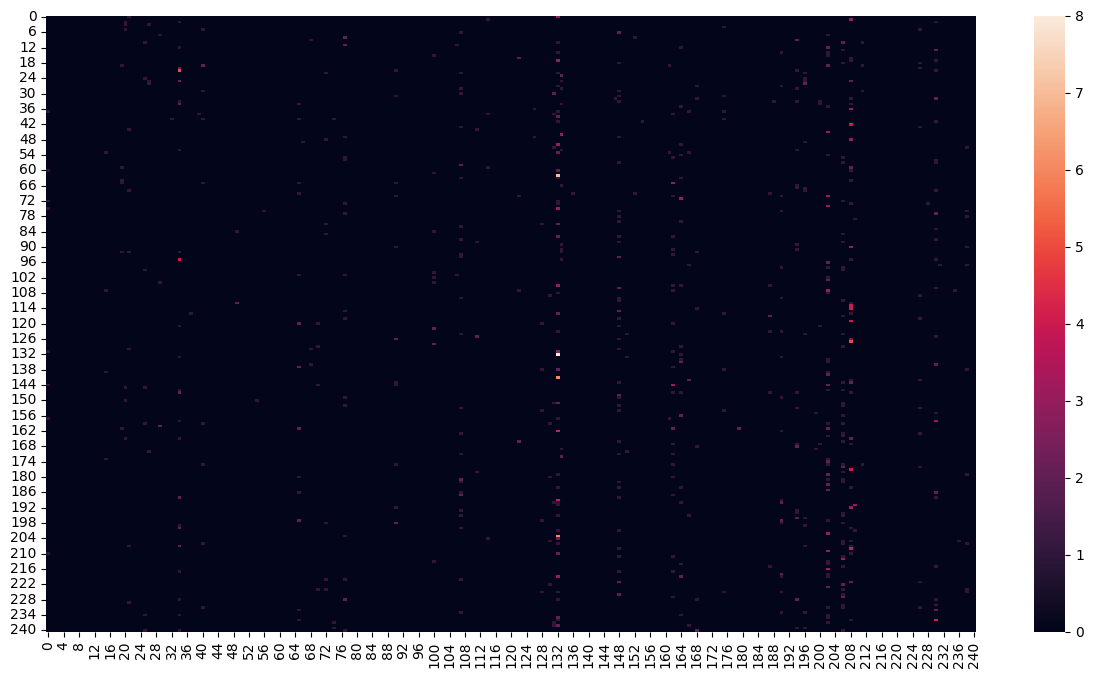

In [ ]:
conf_matrix = confusion_matrix(y_test_vec_1D.argmax(axis=1),y_pred_vec_1D.argmax(axis=1))
sns.heatmap(conf_matrix)

# Model 2 - LSTM

In [ ]:
print('X_train shape =',X_train_vec.shape)
print('y_train shape =',y_train_vec_1D.shape)
print('X_test shape =',X_test_vec.shape)
print('y_test shape =',y_test_vec_1D.shape)

X_train shape = (2726, 180, 130)
y_train shape = (2726, 243)
X_test shape = (827, 180, 130)
y_test shape = (827, 243)


## Model Building

In [ ]:
tf.keras.backend.clear_session()

model_lstm = Sequential()
model_lstm.add(
   TimeDistributed(
      LSTM(130, activation='relu', return_sequences=True,
        input_shape=(X_train_vec.shape[1],X_train_vec.shape[2]))
        ))
model_lstm.add(
    TimeDistributed
     (
        Dense(100, activation='relu')
        ))
model_lstm.add(
    TimeDistributed
     (
        Dense(100, activation='relu')
        ))
model_lstm.add(
    TimeDistributed
     (
        Dense(100, activation='relu')
        ))
model_lstm.add(
    Bidirectional
     (
        LSTM(150, return_sequences=False, activation='relu')
        ))
model_lstm.add(Dense(units=vocab_size,activation='softmax'))

In [ ]:
model_lstm.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
#Model Summary
model_lstm.summary()

In [ ]:
# Creating Checkpoints
checkpoint_filepath = '/content/drive/MyDrive/Mtech_Project/Code/4C_Model_1.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

## Training

In [ ]:
# fit network
history = model_lstm.fit(X_train_vec, y_train_vec_1D, epochs=100, batch_size=128,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 1/100
15/15 - 6s - loss: 5.4967 - accuracy: 0.0068 - val_loss: 5.4933 - val_accuracy: 0.0037 - 6s/epoch - 380ms/step
Epoch 2/100
15/15 - 3s - loss: 5.4941 - accuracy: 0.0073 - val_loss: 5.4954 - val_accuracy: 0.0086 - 3s/epoch - 179ms/step
Epoch 3/100
15/15 - 3s - loss: 5.4850 - accuracy: 0.0079 - val_loss: 5.4940 - val_accuracy: 0.0086 - 3s/epoch - 176ms/step
Epoch 4/100
15/15 - 3s - loss: 5.4754 - accuracy: 0.0073 - val_loss: 5.4984 - val_accuracy: 0.0086 - 3s/epoch - 180ms/step
Epoch 5/100
15/15 - 3s - loss: 5.4649 - accuracy: 0.0079 - val_loss: 5.4965 - val_accuracy: 0.0086 - 3s/epoch - 206ms/step
Epoch 6/100
15/15 - 3s - loss: 5.4512 - accuracy: 0.0079 - val_loss: 5.5000 - val_accuracy: 0.0086 - 3s/epoch - 177ms/step
Epoch 7/100
15/15 - 3s - loss: 5.4376 - accuracy: 0.0084 - val_loss: 5.4987 - val_accuracy: 0.0086 - 3s/epoch - 171ms/step
Epoch 8/100
15/15 - 3s - loss: 5.4234 - accuracy: 0.0115 - val_loss: 5.5066 - val_accuracy: 0.0024 - 3s/epoch - 170ms/step
Epoch 9/100
15/1

In [ ]:
# fit network
history = model_lstm.fit(X_train_vec, y_train_vec_1D, initial_epoch=100, epochs=400, batch_size=128,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 101/400
15/15 - 22s - loss: 4.1764 - accuracy: 0.0714 - val_loss: 5.2123 - val_accuracy: 0.0284 - 22s/epoch - 1s/step
Epoch 102/400
15/15 - 21s - loss: 4.1658 - accuracy: 0.0735 - val_loss: 5.2115 - val_accuracy: 0.0296 - 21s/epoch - 1s/step
Epoch 103/400
15/15 - 19s - loss: 4.1537 - accuracy: 0.0756 - val_loss: 5.2057 - val_accuracy: 0.0259 - 19s/epoch - 1s/step
Epoch 104/400
15/15 - 21s - loss: 4.1428 - accuracy: 0.0719 - val_loss: 5.2123 - val_accuracy: 0.0259 - 21s/epoch - 1s/step
Epoch 105/400
15/15 - 20s - loss: 4.1286 - accuracy: 0.0756 - val_loss: 5.2158 - val_accuracy: 0.0284 - 20s/epoch - 1s/step
Epoch 106/400
15/15 - 19s - loss: 4.1114 - accuracy: 0.0740 - val_loss: 5.2161 - val_accuracy: 0.0284 - 19s/epoch - 1s/step
Epoch 107/400
15/15 - 22s - loss: 4.0947 - accuracy: 0.0782 - val_loss: 5.2503 - val_accuracy: 0.0321 - 22s/epoch - 1s/step
Epoch 108/400
15/15 - 19s - loss: 4.1231 - accuracy: 0.0788 - val_loss: 5.1763 - val_accuracy: 0.0296 - 19s/epoch - 1s/step
Epoch 10

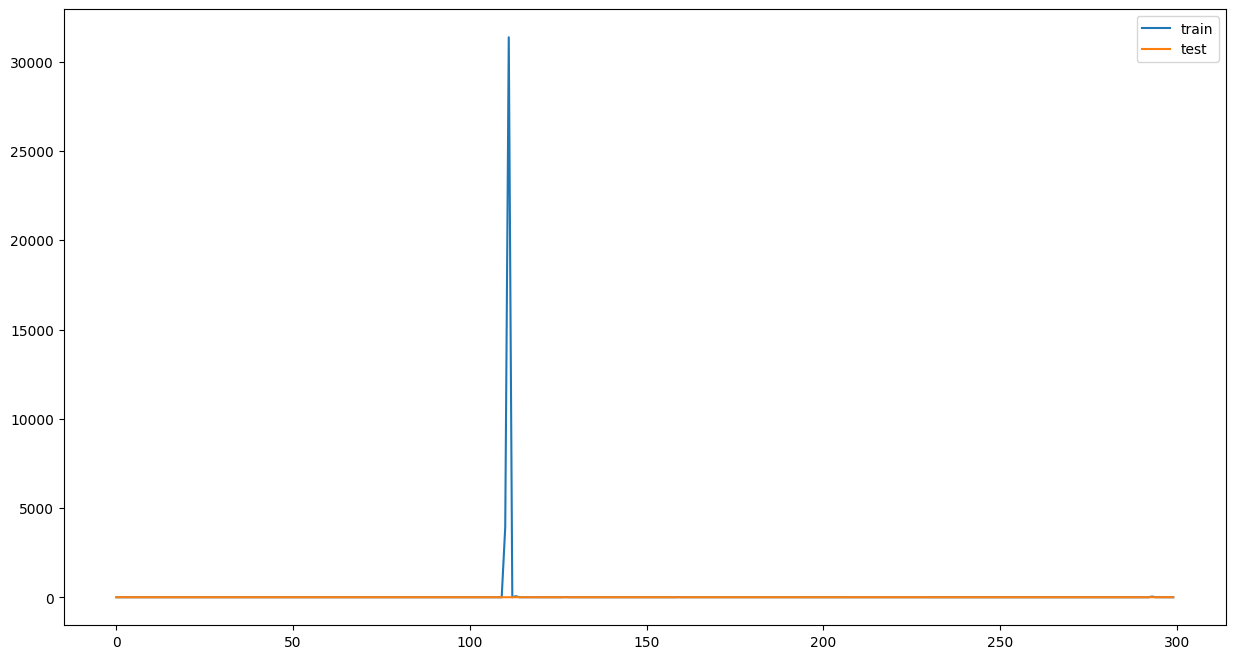

In [ ]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Prediction

In [ ]:
model_lstm.load_weights(checkpoint_filepath)

In [ ]:
# make a prediction
pred_prob_y = model_lstm.predict(X_test_vec)
pred_val_y = np.argmax(pred_prob_y, axis=1)

26/26 [==============================] - 4s 130ms/step


In [ ]:
pred_prob_y[3]

array([1.72303971e-09, 8.04185701e-15, 7.20619981e-04, 4.58166411e-04,
       1.28841111e-06, 3.90344874e-12, 7.42673838e-20, 1.78629012e-09,
       7.78444388e-17, 2.11379054e-14, 1.03072176e-10, 5.99834793e-10,
       3.44589120e-03, 9.36277254e-21, 1.12570785e-02, 1.11705512e-02,
       1.32327997e-08, 1.94345116e-19, 1.29237818e-02, 7.47674378e-03,
       3.17604190e-07, 1.36506921e-08, 5.28973702e-04, 2.86096754e-03,
       4.09315271e-06, 3.51630591e-18, 2.41883100e-07, 1.93631859e-03,
       1.62296972e-04, 3.13298106e-02, 1.26684587e-02, 1.79736421e-19,
       7.60776789e-11, 1.30132154e-08, 3.62939434e-04, 6.92503888e-10,
       7.31201610e-04, 5.84339350e-02, 6.98111762e-05, 2.87653473e-14,
       3.19795571e-02, 4.59042526e-14, 2.71404105e-07, 1.31150963e-13,
       6.44917630e-09, 6.33777453e-15, 1.31183323e-19, 6.37102269e-14,
       1.81500318e-11, 2.24757309e-06, 2.02634651e-02, 5.13394936e-13,
       1.72250346e-21, 2.23476362e-14, 4.07671294e-04, 7.35195633e-03,
      

In [ ]:
pred_val_y[3]

37

In [ ]:
pred_prob_y.shape

(822, 243)

In [ ]:
y_test_vec_1D[3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=uint8)

In [ ]:
y_train_vec_1D.shape

(822, 243)

In [ ]:
# Convert Prediction probability to binary value
y_pred_vec_2 = np.zeros( pred_prob_y.shape )
y_pred_vec_2[np.arange(y_pred_vec_2.shape[0]), pred_val_y] = 1

print(y_pred_vec_2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# make a prediction on training set
pred_prob_train_y = model_lstm.predict(X_train_vec)
pred_val_train_y = np.argmax(pred_prob_train_y, axis=1)

85/85 [==============================] - 0s 5ms/step


In [ ]:
# Convert Prediction probability to binary value
y_pred_vec_train_2 = np.zeros( pred_prob_y.shape )
y_pred_vec_train_2[np.arange(y_pred_vec_train_2.shape[0]), pred_val_y] = 1

print(y_pred_vec_train_2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Evaluation

In [ ]:
print('Training Accuracy Score',accuracy_score(y_train_vec_1D,y_pred_vec_train_1D))

In [ ]:
conf_matrix = confusion_matrix(y_test_vec_1D.argmax(axis=1),y_pred_vec_2.argmax(axis=1))
print('Accuracy Score',accuracy_score(y_test_vec_1D,y_pred_vec_2))
print('Classification report \n',classification_report(y_test_vec_1D,y_pred_vec_2))
print('Confusion Matrix \n',conf_matrix)

Accuracy Score 0.051094890510948905
Classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4
           5       0.14      0.29      0.19         7
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          12       0.08      0.40      0.13         5
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         3
          16       0.

<Axes: >

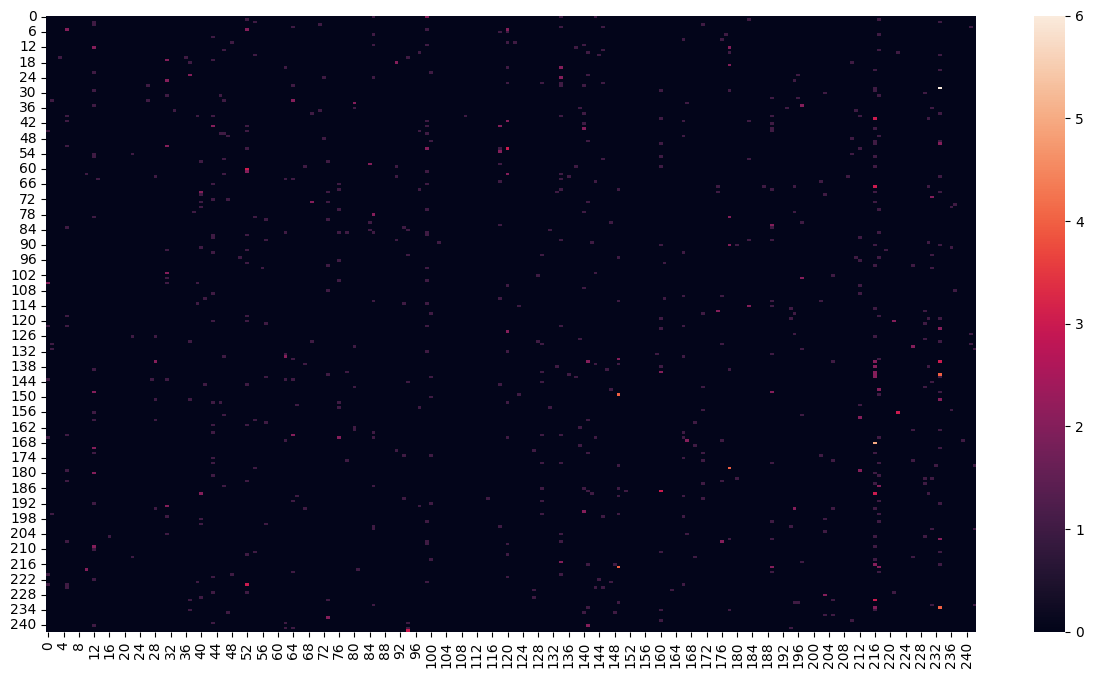

In [ ]:
sns.heatmap(conf_matrix)

# Model 3 - GRU

## Model Building

In [ ]:
tf.keras.backend.clear_session()

model_gru = Sequential()
model_gru.add(
    TimeDistributed(
        Dense(250, activation='relu'),
        input_shape=(X_train_vec.shape[1], X_train_vec.shape[2])
        ))
model_gru.add(Dropout(.2))
model_gru.add(
    TimeDistributed(
        Dense(200, activation='relu')
        ))
model_gru.add(Dropout(.2))
model_gru.add(
    TimeDistributed(
        Dense(150, activation='relu')
        ))
model_gru.add(Dropout(.2))
model_gru.add(
    TimeDistributed(
        Dense(100, activation='relu')
        ))
model_gru.add(Dropout(.2))
model_gru.add(
    TimeDistributed(
        Dense(50, activation='relu')
        ))
model_gru.add(Dropout(.2))
model_gru.add(
    TimeDistributed(
        Dense(25, activation='relu')
        ))
model_gru.add(Dropout(.2))
model_gru.add(
    TimeDistributed(
        Dense(10, activation='relu')
        ))
model_gru.add(Dropout(.2))
model_gru.add(
    Bidirectional
     (
        GRU(100, activation='relu')
        ))
model_gru.add(Dropout(.2))
model_gru.add(Dense(units=vocab_size,activation='softmax'))

In [ ]:
model_gru.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#Model Summary
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 180, 250)         32750     
 ibuted)                                                         
                                                                 
 dropout (Dropout)           (None, 180, 250)          0         
                                                                 
 time_distributed_1 (TimeDis  (None, 180, 200)         50200     
 tributed)                                                       
                                                                 
 dropout_1 (Dropout)         (None, 180, 200)          0         
                                                                 
 time_distributed_2 (TimeDis  (None, 180, 150)         30150     
 tributed)                                                       
                                                        

In [ ]:
# Creating Checkpoints
checkpoint_filepath_2 = '/content/drive/MyDrive/Mtech_Project/Code_OLD/4C_Model_2.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath_2,
    #verbose=1,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

## Training

In [ ]:
# fit network
history_2 = model_gru.fit(X_train_vec, y_train_vec_1D, epochs=300, batch_size=128,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 1/300
15/15 - 22s - loss: 5.4934 - accuracy: 0.0037 - val_loss: 5.4918 - val_accuracy: 0.0037 - 22s/epoch - 1s/step
Epoch 2/300
15/15 - 13s - loss: 5.4808 - accuracy: 0.0058 - val_loss: 5.4931 - val_accuracy: 0.0037 - 13s/epoch - 849ms/step
Epoch 3/300
15/15 - 13s - loss: 5.4536 - accuracy: 0.0032 - val_loss: 5.4907 - val_accuracy: 0.0062 - 13s/epoch - 885ms/step
Epoch 4/300
15/15 - 13s - loss: 5.4376 - accuracy: 0.0058 - val_loss: 5.4925 - val_accuracy: 0.0062 - 13s/epoch - 875ms/step
Epoch 5/300
15/15 - 13s - loss: 5.4285 - accuracy: 0.0111 - val_loss: 5.4951 - val_accuracy: 0.0049 - 13s/epoch - 861ms/step
Epoch 6/300
15/15 - 13s - loss: 5.4238 - accuracy: 0.0053 - val_loss: 5.5027 - val_accuracy: 0.0037 - 13s/epoch - 864ms/step
Epoch 7/300
15/15 - 13s - loss: 5.4182 - accuracy: 0.0085 - val_loss: 5.5102 - val_accuracy: 0.0062 - 13s/epoch - 880ms/step
Epoch 8/300
15/15 - 13s - loss: 5.4120 - accuracy: 0.0079 - val_loss: 5.5219 - val_accuracy: 0.0062 - 13s/epoch - 864ms/step
Epo

In [ ]:
# fit network
history_2 = model_gru.fit(X_train_vec, y_train_vec_1D, initial_epoch=300, epochs=450,
                             batch_size=128,
                             validation_split=0.3,
                             callbacks=[model_checkpoint_callback],
                             verbose=2, shuffle=False)

Epoch 301/450
15/15 - 14s - loss: 0.2151 - accuracy: 0.9286 - val_loss: 8.9323 - val_accuracy: 0.2392 - 14s/epoch - 927ms/step
Epoch 302/450
15/15 - 13s - loss: 0.2471 - accuracy: 0.9244 - val_loss: 8.8945 - val_accuracy: 0.2380 - 13s/epoch - 880ms/step
Epoch 303/450
15/15 - 13s - loss: 0.2742 - accuracy: 0.9186 - val_loss: 9.1563 - val_accuracy: 0.2232 - 13s/epoch - 884ms/step
Epoch 304/450
15/15 - 12s - loss: 0.2301 - accuracy: 0.9270 - val_loss: 8.5740 - val_accuracy: 0.2762 - 12s/epoch - 833ms/step
Epoch 305/450
15/15 - 13s - loss: 0.2121 - accuracy: 0.9339 - val_loss: 8.8109 - val_accuracy: 0.2639 - 13s/epoch - 848ms/step
Epoch 306/450
15/15 - 15s - loss: 0.2247 - accuracy: 0.9318 - val_loss: 8.8517 - val_accuracy: 0.2417 - 15s/epoch - 1s/step
Epoch 307/450
15/15 - 13s - loss: 0.1939 - accuracy: 0.9344 - val_loss: 9.0954 - val_accuracy: 0.2552 - 13s/epoch - 866ms/step
Epoch 308/450
15/15 - 13s - loss: 0.2142 - accuracy: 0.9286 - val_loss: 8.9033 - val_accuracy: 0.2639 - 13s/epoch 

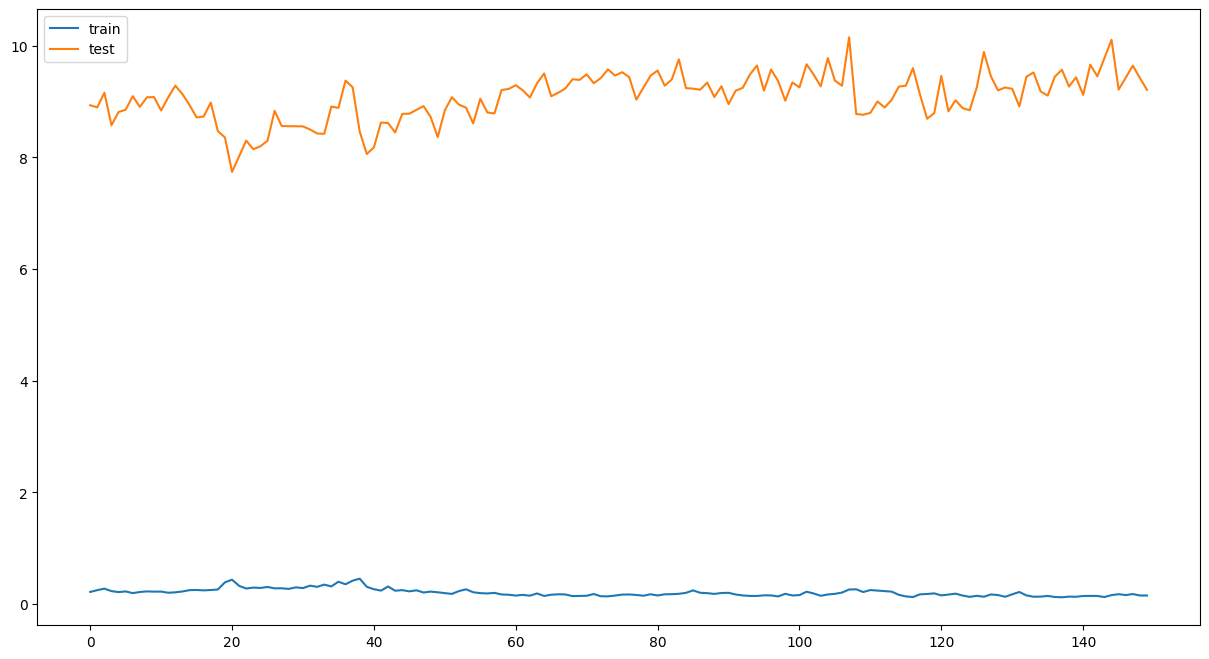

In [ ]:
# plot history
plt.plot(history_2.history['loss'], label='train')
plt.plot(history_2.history['val_loss'], label='test')
plt.legend()
plt.show()

## Prediction

In [ ]:
print(checkpoint_filepath_2)

/content/drive/MyDrive/Mtech_Project/Code/4C_Model_2.h5


In [ ]:
model_gru.load_weights(checkpoint_filepath_2)

In [ ]:
# make a prediction
pred_prob_y_2 = model_gru.predict(X_test_vec)
pred_val_y_2 = np.argmax(pred_prob_y_2, axis=1)

26/26 [==============================] - 2s 93ms/step


In [ ]:
pred_prob_y_2.shape

(829, 243)

In [ ]:
y_test_vec_1D.shape

(829, 243)

In [ ]:
# Convert Prediction probability to binary value
pred_matrix_y_2 = np.zeros( pred_prob_y_2.shape )
pred_matrix_y_2[np.arange(pred_matrix_y_2.shape[0]), pred_val_y_2] = 1

print(pred_matrix_y_2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# make a prediction on training set
pred_prob_train_y_2 = model_4F_1.predict(X_train_vec)
pred_val_train_y_2 = np.argmax(pred_prob_train_y, axis=1)

85/85 [==============================] - 0s 5ms/step


In [ ]:
# Convert Prediction probability to binary value
pred_matrix_train_y_2 = np.zeros( pred_prob_train_y_2.shape )
pred_matrix_train_y_2[np.arange(pred_matrix_train_y_2.shape[0]), pred_val_train_y_2] = 1

print(pred_matrix_train_y_2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Evaluation

In [ ]:
print('Training Accuracy Score',accuracy_score(y_pred_vec_train_1D,pred_val_train_y_2))

Training Accuracy Score 1.0


In [ ]:
conf_matrix = confusion_matrix(y_test_vec_1D.argmax(axis=1),pred_matrix_y_2.argmax(axis=1))
print('Accuracy Score',accuracy_score(y_test_vec_1D,pred_matrix_y_2))
print('Classification report \n',classification_report(y_test_vec_1D,pred_matrix_y_2))
print('Confusion Matrix \n',conf_matrix)

Accuracy Score 0.39927623642943305
Classification report 
               precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.00      0.00      0.00         4
           2       0.33      0.33      0.33         3
           3       0.00      0.00      0.00         2
           4       0.33      0.33      0.33         3
           5       0.17      0.33      0.22         3
           6       0.17      0.50      0.25         2
           7       0.00      0.00      0.00         2
           8       0.25      0.50      0.33         2
           9       0.50      0.25      0.33         4
          10       0.33      0.20      0.25         5
          11       0.50      0.33      0.40         3
          12       0.33      0.33      0.33         3
          13       0.50      0.33      0.40         3
          14       1.00      0.67      0.80         3
          15       0.00      0.00      0.00         2
          16       0.0

<Axes: >

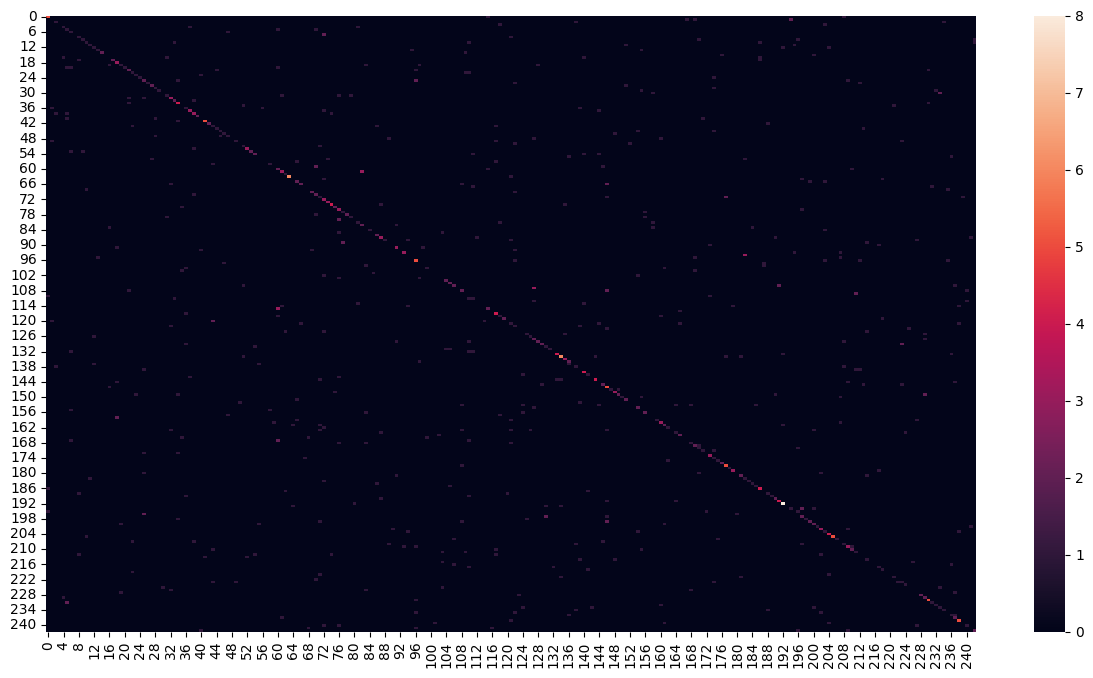

In [ ]:
sns.heatmap(conf_matrix)

# Model 4

In [64]:
print('X_train shape =',X_train_vec.shape)
print('y_train shape =',y_train_vec_1D.shape)
print('X_test shape =',X_test_vec.shape)
print('y_test shape =',y_test_vec_1D.shape)

X_train shape = (2711, 180, 130)
y_train shape = (2711, 243)
X_test shape = (826, 180, 130)
y_test shape = (826, 243)


## Model Building

In [92]:
tf.keras.backend.clear_session()

model_gru_2 = Sequential()
model_gru_2.add(
    TimeDistributed(
        Dense(10, activation='relu'),
        input_shape=(X_train_vec.shape[1], X_train_vec.shape[2])
        ))

model_gru_2.add(Dropout(.2))
model_gru_2.add(
    TimeDistributed(
        Dense(50, activation='relu')
        ))

model_gru_2.add(Dropout(.2))
model_gru_2.add(
    TimeDistributed(
        Dense(50, activation='relu')
        ))

model_gru_2.add(Dropout(.2))
model_gru_2.add(
    TimeDistributed(
        Dense(10, activation='relu')
        ))
model_gru_2.add(Dropout(.2))
model_gru_2.add(
    Bidirectional
     (
        GRU(5, activation='relu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True)
        ))
model_gru_2.add(Dropout(.2))
model_gru_2.add(
    Bidirectional
     (
        GRU(5, activation='relu', dropout=0.2, recurrent_dropout=0.2)
        ))
model_gru_2.add(
        Dense(units=vocab_size,activation='softmax')
        )

In [93]:
model_gru_2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [94]:
#Model Summary
model_gru_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 180, 10)          1310      
 ibuted)                                                         
                                                                 
 dropout (Dropout)           (None, 180, 10)           0         
                                                                 
 time_distributed_1 (TimeDis  (None, 180, 50)          550       
 tributed)                                                       
                                                                 
 dropout_1 (Dropout)         (None, 180, 50)           0         
                                                                 
 time_distributed_2 (TimeDis  (None, 180, 50)          2550      
 tributed)                                                       
                                                        

In [95]:
# Creating Checkpoints
checkpoint_filepath_4 = '/content/drive/MyDrive/Mtech_Project/Code/5A_Model_4.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath_4,
    #verbose=1,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

## Training

In [ ]:
# fit network
history_4 = model_gru_2.fit(X_train_vec, y_train_vec_1D, epochs=50, batch_size=32,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 1/50
60/60 - 142s - loss: 5.4929 - accuracy: 0.0042 - val_loss: 5.4915 - val_accuracy: 0.0037 - 142s/epoch - 2s/step
Epoch 2/50
60/60 - 127s - loss: 5.4855 - accuracy: 0.0063 - val_loss: 5.4884 - val_accuracy: 0.0037 - 127s/epoch - 2s/step
Epoch 3/50
60/60 - 127s - loss: 5.4671 - accuracy: 0.0069 - val_loss: 5.4851 - val_accuracy: 0.0037 - 127s/epoch - 2s/step
Epoch 4/50
60/60 - 126s - loss: 5.4530 - accuracy: 0.0063 - val_loss: 5.4827 - val_accuracy: 0.0025 - 126s/epoch - 2s/step
Epoch 5/50
60/60 - 126s - loss: 5.4389 - accuracy: 0.0069 - val_loss: 5.4817 - val_accuracy: 0.0037 - 126s/epoch - 2s/step
Epoch 6/50


In [ ]:
# plot history
plt.plot(history_4.history['loss'], label='train loss')
plt.plot(history_4.history['val_loss'], label='test loss')
plt.legend()
plt.show()

In [ ]:
# fit network
history_4 = model_gru_2.fit(X_train_vec, y_train_vec_1D, initial_epoch=50, epochs=100,
                             batch_size=32,
                             validation_split=0.3,
                             callbacks=[model_checkpoint_callback],
                             verbose=2, shuffle=False)

In [ ]:
# plot history
plt.plot(history_4.history['loss'], label='train')
plt.plot(history_4.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# fit network
history_4 = model_gru_2.fit(X_train_vec, y_train_vec_1D, initial_epoch=100, epochs=150,
                             batch_size=32,
                             validation_split=0.3,
                             callbacks=[model_checkpoint_callback],
                             verbose=2, shuffle=False)

In [ ]:
# plot history
plt.plot(history_4.history['loss'], label='train')
plt.plot(history_4.history['val_loss'], label='test')
plt.legend()
plt.show()

## Prediction

In [ ]:
checkpoint_filepath_4 = '/content/drive/MyDrive/Mtech_Project/Code/5A_Model_4.h5'
print(checkpoint_filepath_4)

/content/drive/MyDrive/Mtech_Project/Code/4C_Model_4.h5


In [ ]:
model_gru_2.load_weights(checkpoint_filepath_4)

In [ ]:
# make a prediction
pred_prob_y_4 = model_gru_2.predict(X_test_vec)

26/26 [==============================] - 1s 38ms/step


In [ ]:
print('Prediction Probability shape =',pred_prob_y_4.shape)
print('Y Test shape =',y_test_vec.shape)

Prediction Probability shape = (832, 243)
Y Test shape = (832, 180, 243)


In [ ]:
y_test_vec_1D = y_test_vec[:,15,:]

In [ ]:
print('Prediction Probability shape =',pred_prob_y_4.shape)
print('Y Test shape =',y_test_vec_1D.shape)

Prediction Probability shape = (832, 243)
Y Test shape = (832, 243)


## Evaluation

In [ ]:
#conf_matrix = confusion_matrix(y_test_vec,pred_val_y_3.argmax(axis=1))
print('Accuracy Score',accuracy_score(y_test_vec_1D,pred_class_y_4))
print('Classification report \n',classification_report(y_test_vec_1D,pred_class_y_4))
#print('Confusion Matrix \n',conf_matrix)

In [ ]:
sns.heatmap(conf_matrix)